## Barclays IB Analytics Case Study Submission
> Divyansh <br>
> IIT Kanpur <br>
> mail: (divyansh21@iitk.ac.in) <br>
> roll: (210355) <br>

## Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
train = pd.read_csv("train.csv")
train.head()

,sentence,snippets,target,sentiment_score,aspects,format,label
0,Still short $LNG from $11.70 area...next stop ...,['Still short $LNG from $11.70 area...next sto...,LNG,-0.543,['Stock/Price Action/Volatility/Short Selling'],post,2
1,$PLUG bear raid,['bear raid'],PLUG,-0.480,['Stock/Price Action/Bearish'],post,2
2,How Kraft-Heinz Merger Came Together in Speedy...,['Merger Came Together in Speedy 10 Weeks'],Kraft,0.214,['Corporate/M&A/M&A'],headline,0
3,Slump in Weir leads FTSE down from record high,['down from record high'],Weir,-0.827,['Market/Volatility/Volatility'],headline,2
4,"$AAPL bounces off support, it seems",['bounces off support'],AAPL,0.443,['Stock/Price Action/Bullish/Bullish Behaviour'],post,0


In [ ]:
print(train.describe())
print('='*20)
print(train.info())

       sentiment_score       label
count       961.000000  961.000000
mean          0.142210    0.649324
std           0.408823    0.917891
min          -0.854000    0.000000
25%          -0.260000    0.000000
50%           0.281000    0.000000
75%           0.461000    2.000000
max           0.975000    2.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sentence         961 non-null    object 
 1   snippets         961 non-null    object 
 2   target           961 non-null    object 
 3   sentiment_score  961 non-null    float64
 4   aspects          961 non-null    object 
 5   format           961 non-null    object 
 6   label            961 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 52.7+ KB
None


#### With initial information in hand(above), let's see how the data is distributed and what are the correlations.


### Sentiment Distribution


Sentiment Score Summary Statistics:
count    961.000000
mean       0.142210
std        0.408823
min       -0.854000
25%       -0.260000
50%        0.281000
75%        0.461000
max        0.975000
Name: sentiment_score, dtype: float64


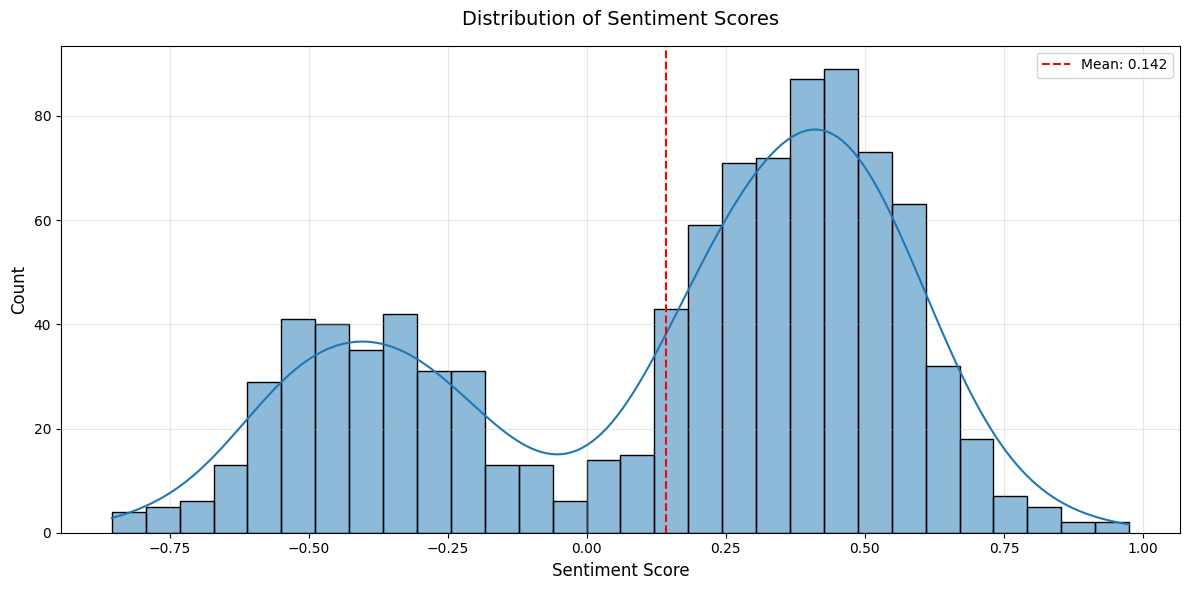

In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(data=train, x='sentiment_score', bins=30, kde=True)

plt.axvline(x=train['sentiment_score'].mean(), color='red', linestyle='--', label=f'Mean: {train["sentiment_score"].mean():.3f}')
# plt.axvline(x=train['sentiment_score'].mean(), linestyle='--', label=f'Mean: {train["sentiment_score"].mean():.3f}')

plt.title('Distribution of Sentiment Scores', fontsize=14, pad=15)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

print("\nSentiment Score Summary Statistics:")
print(train['sentiment_score'].describe())

plt.tight_layout()
plt.show()

#### Sentiment_score analysis
* The sentiment scores have normal distribution in both negative and positive domain individually
* Neutral sentiments are fairly less in number



### Formats Analysis


Format-wise Sentiment Analysis:
          count   mean    std    min    max
format                                     
headline    367  0.114  0.393 -0.854  0.975
post        594  0.160  0.418 -0.745  0.814


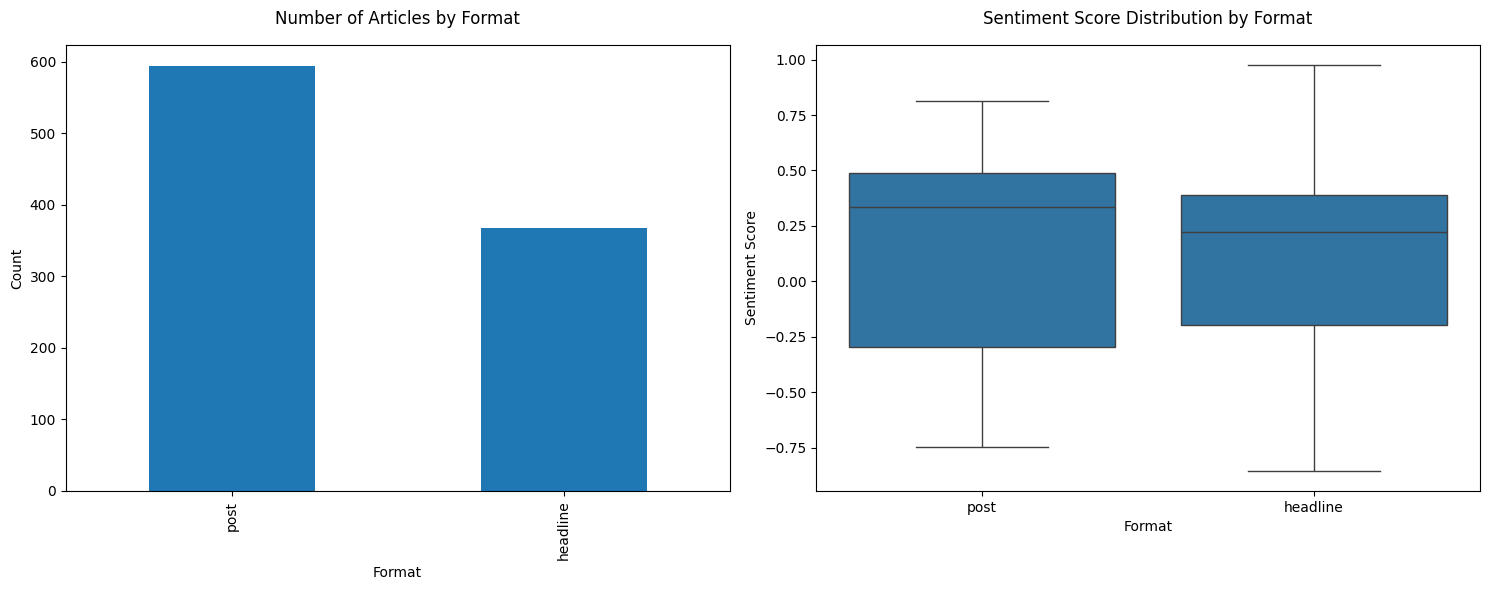

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

format_counts = train['format'].value_counts()
format_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Number of Articles by Format', fontsize=12, pad=15)
ax1.set_xlabel('Format')
ax1.set_ylabel('Count')

sns.boxplot(data=train, x='format', y='sentiment_score', ax=ax2)
ax2.set_title('Sentiment Score Distribution by Format', fontsize=12, pad=15)
ax2.set_xlabel('Format')
ax2.set_ylabel('Sentiment Score')

print("\nFormat-wise Sentiment Analysis:")
format_stats = train.groupby('format')['sentiment_score'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(3)
print(format_stats)

plt.tight_layout()
plt.show()

**Note** : As we can see that the type of article doesn't really affect the sentiment of the post.


### Labels Analysis


Label-wise Sentiment Analysis:
       count   mean    std
label                     
0        632  0.409  0.162
1         34 -0.001  0.060
2        295 -0.413  0.156


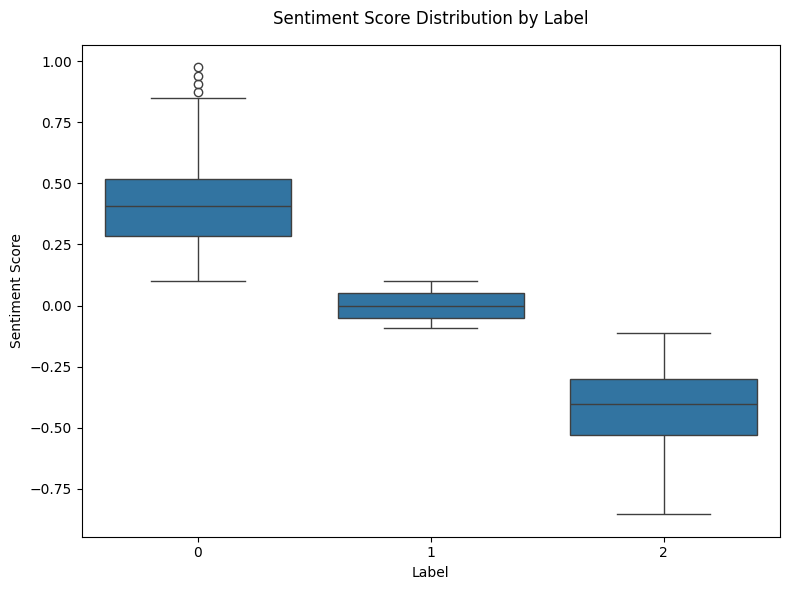

In [ ]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=train, x='label', y='sentiment_score')
plt.title('Sentiment Score Distribution by Label', fontsize=12, pad=15)
plt.xlabel('Label')
plt.ylabel('Sentiment Score')

print("\nLabel-wise Sentiment Analysis:")
label_stats = train.groupby('label')['sentiment_score'].agg([
    'count', 'mean', 'std'
]).round(3)
print(label_stats)

plt.tight_layout()
plt.show()

**Note** The lable must not be the part of the training data otherwise it will make the sentiment score prediction <br> too trivial since there is a very sharp correlation between them


### Aspects analysis

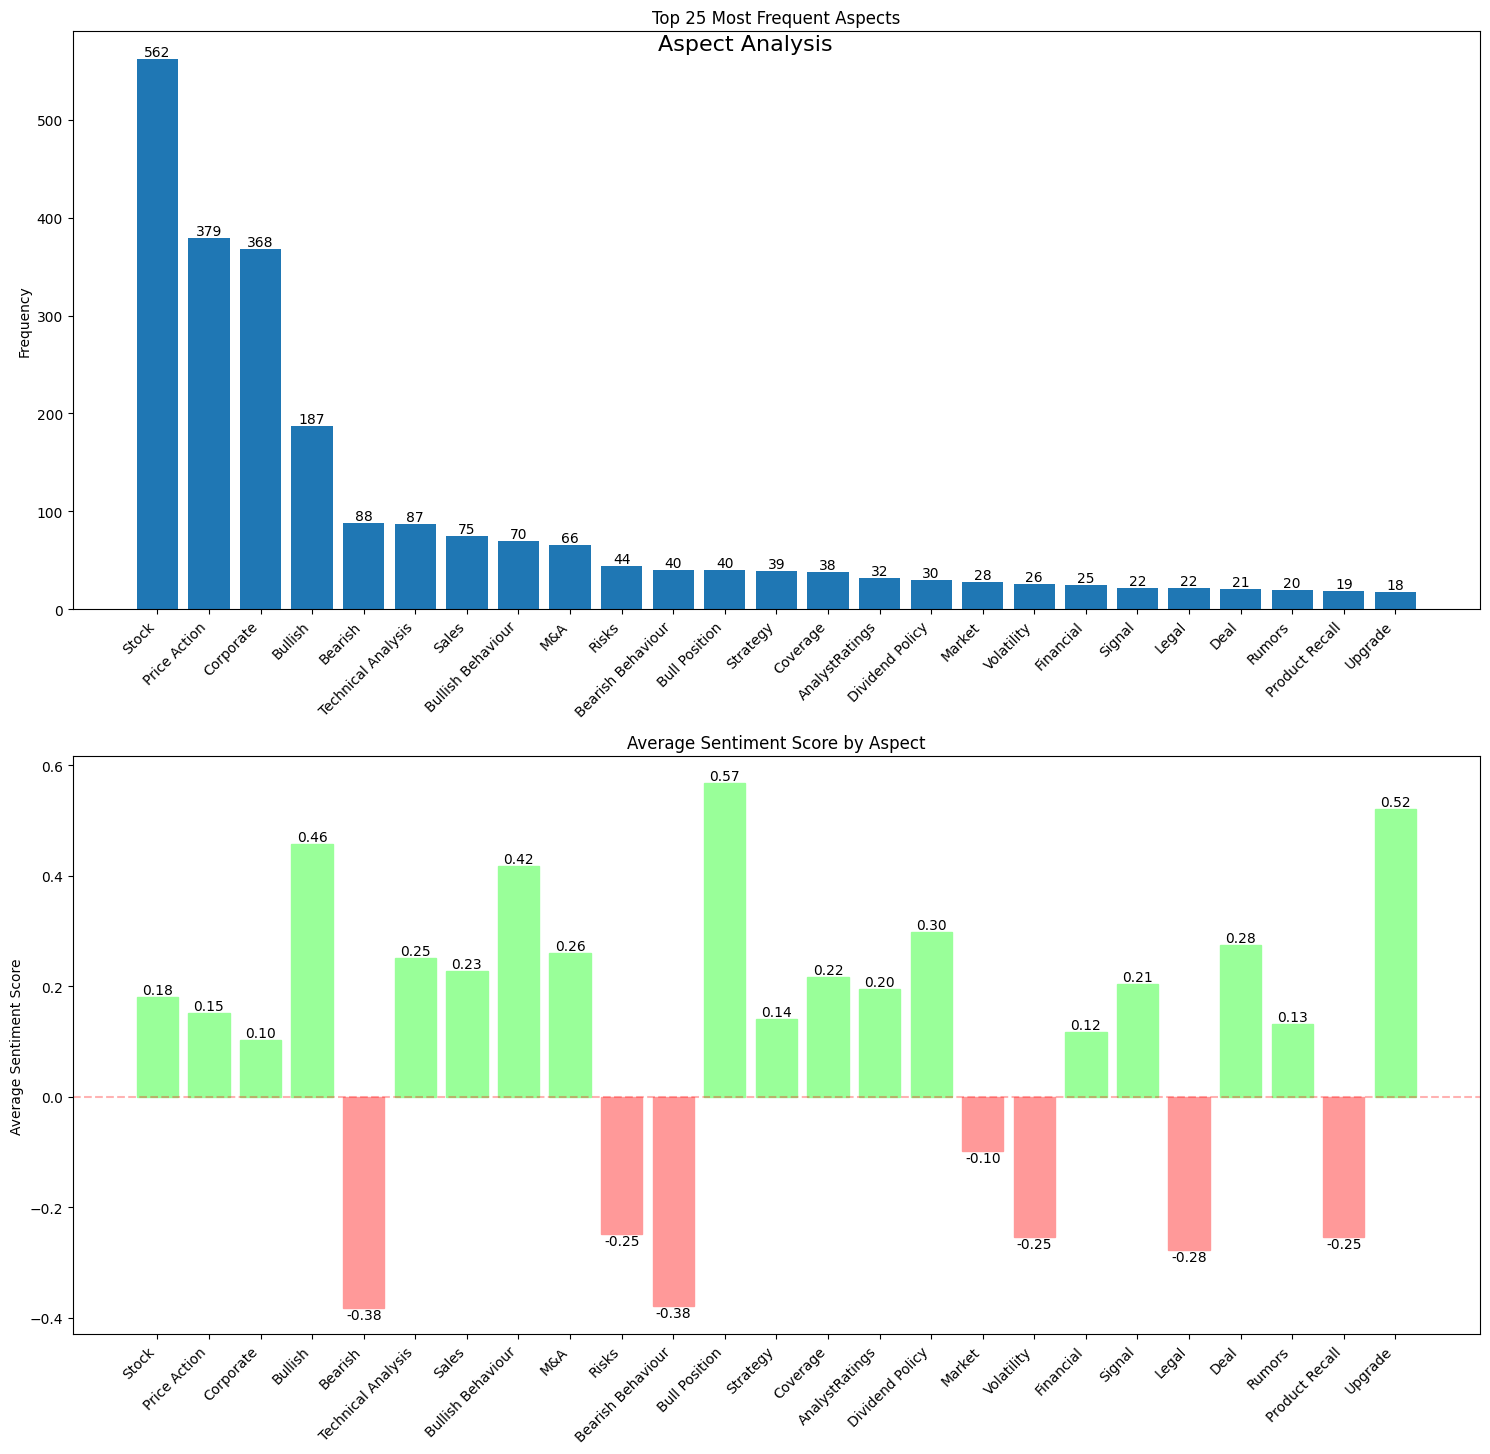

In [ ]:
aspect_list = []
aspect_sentiments = {}

for i in range(len(train)):
    aspects = train.iloc[i]['aspects'][2:-2].split('/')
    aspects = np.unique(aspects).tolist()
    sentiment = train.iloc[i]['sentiment_score']

    for aspect in aspects:
        aspect_list.append(aspect)
        if aspect not in aspect_sentiments:
            aspect_sentiments[aspect] = []
        aspect_sentiments[aspect].append(sentiment)

aspect_counts = pd.Series(aspect_list).value_counts()
aspect_mean_sentiment = {aspect: np.mean(sentiments)
                        for aspect, sentiments in aspect_sentiments.items()}

top_20_aspects = aspect_counts.head(25)
# top_20_aspects = aspect_counts.head(20)
top_20_sentiments = {aspect: aspect_mean_sentiment[aspect]
                    for aspect in top_20_aspects.index}
# top_20_sentiments = {aspect: aspect_mean_sentiment[aspect]
#                     for aspect in top_25_aspects.index}

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))
fig.suptitle('Aspect Analysis', fontsize=16, y=0.95)

bars = ax1.bar(range(len(top_20_aspects)), top_20_aspects.values)
ax1.set_xticks(range(len(top_20_aspects)))
# bars = ax1.bar(range(len(aspects)), aspects.values)
# ax1.set_xticks(range(len(aspects)))

ax1.set_xticklabels(top_20_aspects.index, rotation=45, ha='right')
ax1.set_title('Top 25 Most Frequent Aspects')
ax1.set_ylabel('Frequency')

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

sentiment_values = list(top_20_sentiments.values())
bars = ax2.bar(range(len(top_20_sentiments)), sentiment_values)
ax2.set_xticks(range(len(top_20_sentiments)))
ax2.set_xticklabels(top_20_sentiments.keys(), rotation=45, ha='right')
# ax2.set_xticklabels(top_20_sentiments.keys(), rotation=45, ha='right')
ax2.set_title('Average Sentiment Score by Aspect')
ax2.set_ylabel('Average Sentiment Score')
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.3)

for i, bar in enumerate(bars):
    if sentiment_values[i] < 0:
        bar.set_color('#ff9999')
    else:
        bar.set_color('#99ff99')

    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom' if height > 0 else 'top')

plt.tight_layout()
plt.show()

**Note**: Apart from what is very evident from the above plot, the key takeaway for further task will be <br>
that sentiment score predictiona and aspect classification are not completely independent task we can try to <br>
benefit from on another

## Preprocessing Data

Here, we will vectorize the data using a bert (finetuned for financial settings) and also prepare a dataloader to training task

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from transformers import AutoTokenizer, AutoModel
import ast
from sklearn.preprocessing import MultiLabelBinarizer
import re

/home/divyansh/Documents/Barclays_submission/barclay/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# clean sentences for clean tokenization and less noise
def clean(text):
    text = str(text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = text.replace('$', '')
    text = text.replace('#', '')
    text = re.sub(r'\s+', ' ', text)

    text = text.strip()
    return text

In [ ]:
# Preprocess data to extract features and also prepare the Dataset loader
class FinancialAspectDataset(Dataset):
    def __init__(self, csv_file, tokenizer_name='ProsusAI/finbert', max_length=128):
        self.df = pd.read_csv(csv_file)

        self.tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
        self.max_length = max_length

        with open("unique_aspects", 'r') as file:
            aspects_list = [line.strip() for line in file]

        self.aspects = aspects_list #unique aspects

        self.mlb = MultiLabelBinarizer()
        self.aspect_labels = self.mlb.fit_transform(self.aspects)
        self.aspect_classes = self.mlb.classes_
        self.num_aspects = len(self.aspect_classes)

    def __len__(self):
        return len(self.df)

    def process_aspects(self, aspects):
        aspect_names = np.unique(aspects[2:-2].split('/')).tolist()
        true_mask = [self.aspects.index(a) for a in aspect_names if a != '']
        aspect_ids = [0]*len(self.aspects)
        for m in true_mask:
            aspect_ids[m] = 1
        return aspect_ids

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        sentence = str(row['sentence'])
        snippet = ast.literal_eval(row['snippets'])[0]
        # print("snippet: ", snippet)
        target = str(row['target'])
        # print("target: ", target)

        sentence_encoding = self.tokenizer(
            clean(sentence),
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )
        snippet_encoding = self.tokenizer(
            clean(snippet),
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )
        target_encoding = self.tokenizer(
            clean(target),
            padding='max_length',
            truncation=True,
            max_length=32,  # intentionally kam rakha hai
            return_tensors='pt'
        )

        aspect_label_ids = self.process_aspects(row['aspects'])
        return {
            'sentence_ids': sentence_encoding['input_ids'].squeeze(0),
            'sentence_mask': sentence_encoding['attention_mask'].squeeze(0),
            'snippet_ids': snippet_encoding['input_ids'].squeeze(0),
            'snippet_mask': snippet_encoding['attention_mask'].squeeze(0),
            'target_ids': target_encoding['input_ids'].squeeze(0),
            'target_mask': target_encoding['attention_mask'].squeeze(0),
            'aspect_label_ids': (torch.tensor(aspect_label_ids, dtype=float)).squeeze(0),
            'sentiment_score': torch.FloatTensor([float(row['sentiment_score'])])
        }

In [ ]:
# Create data loaders
seed = 42
csv_file = "train.csv"
batch_size = 8
torch.manual_seed(seed)
dataset = FinancialAspectDataset(csv_file)
train_loader = DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True
)

for batch in train_loader:
    print(batch.keys())
    break

dict_keys(['sentence_ids', 'sentence_mask', 'snippet_ids', 'snippet_mask', 'target_ids', 'target_mask', 'aspect_label_ids', 'sentiment_score'])


## ML Modelling
Main thing to notice here is that, for any `sentence` or `snippet`, the `target` governs <br>
the aspect and sentiment_score. So, from the sentences we would need retrieve what is being <br>
talked about the target. We will do this by attention mechanism with `target` as the querry

In [ ]:
# Modelling target based attention
class TargetAttention(torch.nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        # 8 -> 2 or 4
        self.attention = torch.nn.MultiheadAttention(
            embed_dim=hidden_dim,
            num_heads=2,
            dropout=0.1
        )

        self.hidden_dim = 768
        # self.dim_reducer = torch.nn.Linear(-1, self.hidden_dim)

    def forward(self, sentence_encoding, snippet_encoding, target_encoding):
        # sentence_reduced = self.dim_reducer(sentence_encoding)
        # snippet_reduced = self.dim_reducer(snippet_encoding)
        # target_reduced = self.dim_reducer(target_encoding)

        attn_output, attn_weights = self.attention(
            query   =   target_encoding,
            key     =   sentence_encoding,
            value   =   snippet_encoding
        )

        return attn_output, attn_weights

In [ ]:
# Modelling the final model
# have both sentiment score and aspect classification

class AspectDetectionModel(torch.nn.Module):
    def __init__(self, num_aspects):
        super().__init__()
        self.finbert = AutoModel.from_pretrained('ProsusAI/finbert')

        for param in self.finbert.parameters():
            param.requires_grad = False

        for param in self.finbert.encoder.layer[-2:].parameters():
            param.requires_grad = True

        self.target_attention = TargetAttention(hidden_dim=768)

        self.aspect_classifier = torch.nn.Sequential(
            torch.nn.Linear(768, 128),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.2),
            torch.nn.Linear(128, num_aspects),
        )
        self.sentiment_regressor = torch.nn.Sequential(
            torch.nn.Linear(768, 128),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.2),
            torch.nn.Linear(128, 1),
            torch.nn.Tanh()
        )

    def forward(self, sentence_ids, sentence_mask,
                              snippet_ids, snippet_mask,
                              target_ids, target_mask):
        sentence_encoding = self.finbert(sentence_ids, sentence_mask)[0]  # [batch_size, seq_len, 768]
        sentence_encoding = sentence_encoding[:, 0, :] # B, H
        # print("sent_encoding: ",sentence_encoding.shape)
        snippet_encoding = self.finbert(snippet_ids, snippet_mask)[0]
        snippet_encoding = snippet_encoding[:, 0, :]
        # print("snippet_encoding: ",snippet_encoding.shape)
        target_encoding = self.finbert(target_ids, target_mask)[0]
        target_encoding = target_encoding[:,0,:]
        # print("target_encoding: ",target_encoding.shape)

        target_aware_output, _ = self.target_attention(
            sentence_encoding=sentence_encoding,
            snippet_encoding=snippet_encoding,
            target_encoding=target_encoding
        )

        # print("attn_output: ",target_aware_output.shape)

        aspect_logits = self.aspect_classifier(target_aware_output)
        sentiment_score = self.sentiment_regressor(target_aware_output)
        # print("output_logits: ",aspect_logits.shape)
        # print(aspect_logits[0])
        return aspect_logits, sentiment_score

**Note** : Key thing to note here is that I am training for both aspect task and sentiment <br>
score prediction task simultaneously so that they can get benefit from each other's loss

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

ASPECT_LIST = 119
num_epochs = 3

model = AspectDetectionModel(num_aspects=ASPECT_LIST).to(device)
criterion = torch.nn.BCEWithLogitsLoss()
sentiment_criterion = torch.nn.MSELoss()

optimizer = AdamW([
    {'params': model.finbert.parameters(), 'lr': 2e-5},
    {'params': model.target_attention.parameters(), 'lr': 1e-4},
    {'params': model.aspect_classifier.parameters(), 'lr': 1e-3},
    {'params': model.sentiment_regressor.parameters(), 'lr': 1e-3}
])

print(model)

cuda:0
AspectDetectionModel(
  (finbert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

**Remarks**
- I have taken BCE with logits loss for taining for aspect classifications since it is a multi-lable classification task
- I have MSE loss for training for sentiment score since it will help us to converge nicely


## Training code

In [ ]:
# Training loop
aspect_loss_hist = []
sentiment_loss_hist = []
tot_loss_hist = []
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    cnt = 0
    for batch in train_loader:
        cnt += 1
        sentence_ids = batch['sentence_ids'].to(device)
        sentence_mask = batch['sentence_mask'].to(device)
        snippet_ids = batch['snippet_ids'].to(device)
        snippet_mask = batch['snippet_mask'].to(device)
        target_ids = batch['target_ids'].to(device)
        target_mask = batch['target_mask'].to(device)

        aspect_labels = batch['aspect_label_ids'].to(device)  # Binary matrix [batch_size, num_aspects]
        true_sentiment_scores = batch['sentiment_score'].to(device)
        # print("true: ", aspect_labels.shape)

        # print("forward pass: ")
        aspect_logits, pred_sentiment_score = model(sentence_ids, sentence_mask,
                              snippet_ids, snippet_mask,
                              target_ids, target_mask)

        # print("pred: ", aspect_logits.shape)

        aspect_loss = criterion(aspect_logits, aspect_labels)
        sentiment_loss = sentiment_criterion(pred_sentiment_score.squeeze(), true_sentiment_scores.squeeze())

        loss = aspect_loss + sentiment_loss

        aspect_loss_hist.append(aspect_loss.cpu())
        sentiment_loss_hist.append(sentiment_loss.cpu())
        tot_loss_hist.append(loss.cpu())

        if cnt%20==0:
            print(f"{int(cnt)}/{(epoch+1)}:")
            print("\t loss:           ", loss.item())
            print("\t aspect_loss:    ", aspect_loss.item())
            print("\t sentiment_loss: ", sentiment_loss.item())
        epoch_loss += loss

        optimizer.zero_grad()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

    print("\n----------------------------")
    print(f"epoch_loss @{epoch+1}: ", (epoch_loss/cnt).item())
    print("----------------------------\n")

20/1:
	 loss:            0.22312268990428508
	 aspect_loss:     0.07568399983794749
	 sentiment_loss:  0.14743869006633759
40/1:
	 loss:            0.18400817801941094
	 aspect_loss:     0.07950721373546775
	 sentiment_loss:  0.10450096428394318
60/1:
	 loss:            0.20157609199870283
	 aspect_loss:     0.09958910261977369
	 sentiment_loss:  0.10198698937892914
80/1:
	 loss:            0.238621167008992
	 aspect_loss:     0.07556530005228118
	 sentiment_loss:  0.16305586695671082
100/1:
	 loss:            0.2157115586759413
	 aspect_loss:     0.06234645328539259
	 sentiment_loss:  0.1533651053905487
120/1:
	 loss:            0.2043880509376964
	 aspect_loss:     0.0656071888447246
	 sentiment_loss:  0.1387808620929718

----------------------------
epoch_loss @1:  0.2374676589029084
----------------------------

20/2:
	 loss:            0.22366478924929095
	 aspect_loss:     0.08252172057806444
	 sentiment_loss:  0.1411430686712265
40/2:
	 loss:            0.22960695565654698
	 asp

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, mean_squared_error

def flat(arr):
    a = []
    for i in range(len(arr)):
        # print(i)
        if arr[i].shape == torch.Size([]):
            a.append(arr[i].item())
            break
        for j in range(len(arr[i])):
            a.append(arr[i][j].item())

    return a


def metric_eval(data_loader):
    model.eval()
    total_aspect_loss = 0
    total_sentiment_loss = 0
    val_steps = 0

    all_aspect_predictions = []
    all_true_aspects = []
    all_sentiment_predictions = []
    all_true_sentiments = []

    with torch.no_grad():
        for batch in data_loader:
            sentence_ids = batch['sentence_ids'].to(device)
            sentence_mask = batch['sentence_mask'].to(device)
            snippet_ids = batch['snippet_ids'].to(device)
            snippet_mask = batch['snippet_mask'].to(device)
            target_ids = batch['target_ids'].to(device)
            target_mask = batch['target_mask'].to(device)

            aspect_labels = batch['aspect_label_ids'].to(device)
            sentiment_scores = batch['sentiment_score'].to(device)

            aspect_logits, pred_sentiment = model(sentence_ids, sentence_mask,
                                                snippet_ids, snippet_mask,
                                                target_ids, target_mask)

            aspect_loss = criterion(aspect_logits, aspect_labels)
            sentiment_loss = sentiment_criterion(pred_sentiment.squeeze(), sentiment_scores.squeeze())

            total_aspect_loss += aspect_loss.item()
            total_sentiment_loss += sentiment_loss.item()
            val_steps += 1

            aspect_predictions = torch.sigmoid(aspect_logits) > 0.2


            aspect_predictions = aspect_predictions.cpu().numpy()
            true_aspects = aspect_labels.cpu().numpy()
            sentiment_predictions = pred_sentiment.squeeze().cpu()
            true_sentiments = sentiment_scores.squeeze().cpu()

            all_aspect_predictions.append(aspect_predictions)
            all_true_aspects.append(true_aspects)
            all_sentiment_predictions.append(sentiment_predictions)
            all_true_sentiments.append(true_sentiments)

    all_aspect_predictions = np.vstack(all_aspect_predictions)
    all_true_aspects = np.vstack(all_true_aspects)
    # all_sentiment_predictions = np.vstack(all_sentiment_predictions)
    # all_true_sentiments = np.vstack(all_true_sentiments)

    all_sentiment_predictions = flat(all_sentiment_predictions)
    all_true_sentiments = flat(all_true_sentiments)
    # Calculate metrics
    precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(
        all_true_aspects, all_aspect_predictions, average='micro'
    )

    sentiment_mse = mean_squared_error(all_true_sentiments, all_sentiment_predictions)
    avg_aspect_loss = total_aspect_loss / val_steps
    avg_sentiment_loss = total_sentiment_loss / val_steps

    print(f"Aspect Loss: {avg_aspect_loss:.4f}")
    print(f"Sentiment MSE Loss: {avg_sentiment_loss:.4f}")

    print("\nAspect Classification Metrics (Micro-averaged):")
    print(f"Precision: {precision_micro:.4f}")
    print(f"Recall: {recall_micro:.4f}")
    print(f"F1-score: {f1_micro:.4f}")

    print("\nSentiment Regression Metrics:")
    print(f"MSE: {sentiment_mse:.4f}")
    print('-'*60)

In [ ]:
print("Eval Metric on Training Data")
print('-'*60)
metric_eval(train_loader)

Eval Metric on Training Data
------------------------------------------------------------

Validation Results:
Aspect Loss: 0.0680
Sentiment MSE Loss: 0.1557

Aspect Classification Metrics (Micro-averaged):
Precision: 0.4584
Recall: 0.5059
F1-score: 0.4810

Sentiment Regression Metrics:
MSE: 0.1544
------------------------------------------------------------


In [ ]:
val_data = FinancialAspectDataset("validation.csv")
val_loader = DataLoader(
    val_data,
    batch_size=batch_size,
    shuffle=True
)
print("Eval Metric on Validation Data")
print('-'*60)

model.eval()
total_aspect_loss = 0
total_sentiment_loss = 0
val_steps = 0

all_aspect_predictions = []
all_true_aspects = []
all_sentiment_predictions = []
all_true_sentiments = []

with torch.no_grad():
    for batch in val_loader:
        sentence_ids = batch['sentence_ids'].to(device)
        sentence_mask = batch['sentence_mask'].to(device)
        snippet_ids = batch['snippet_ids'].to(device)
        snippet_mask = batch['snippet_mask'].to(device)
        target_ids = batch['target_ids'].to(device)
        target_mask = batch['target_mask'].to(device)

        aspect_labels = batch['aspect_label_ids'].to(device)
        sentiment_scores = batch['sentiment_score'].to(device)

        aspect_logits, pred_sentiment = model(sentence_ids, sentence_mask,
                                            snippet_ids, snippet_mask,
                                            target_ids, target_mask)

        aspect_loss = criterion(aspect_logits, aspect_labels)
        sentiment_loss = sentiment_criterion(pred_sentiment.squeeze(), sentiment_scores.squeeze())

        total_aspect_loss += aspect_loss.item()
        total_sentiment_loss += sentiment_loss.item()
        val_steps += 1

        aspect_predictions = torch.sigmoid(aspect_logits) > 0.2


        aspect_predictions = aspect_predictions.cpu().numpy()
        true_aspects = aspect_labels.cpu().numpy()
        sentiment_predictions = pred_sentiment.squeeze().cpu()
        true_sentiments = sentiment_scores.squeeze().cpu()

        all_aspect_predictions.append(aspect_predictions)
        all_true_aspects.append(true_aspects)
        all_sentiment_predictions.append(sentiment_predictions)
        all_true_sentiments.append(true_sentiments)

all_aspect_predictions = np.vstack(all_aspect_predictions)
all_true_aspects = np.vstack(all_true_aspects)
# all_sentiment_predictions = np.vstack(all_sentiment_predictions)
# all_true_sentiments = np.vstack(all_true_sentiments)

all_sentiment_predictions = flat(all_sentiment_predictions)
all_true_sentiments = flat(all_true_sentiments)
# Calculate metrics
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(
    all_true_aspects, all_aspect_predictions, average='micro'
)

sentiment_mse = mean_squared_error(all_true_sentiments, all_sentiment_predictions)
avg_aspect_loss = total_aspect_loss / val_steps
avg_sentiment_loss = total_sentiment_loss / val_steps

print(f"Aspect Loss: {avg_aspect_loss:.4f}")
print(f"Sentiment MSE Loss: {avg_sentiment_loss:.4f}")

print("\nAspect Classification Metrics (Micro-averaged):")
print(f"Precision: {precision_micro:.4f}")
print(f"Recall: {recall_micro:.4f}")
print(f"F1-score: {f1_micro:.4f}")

print("\nSentiment Regression Metrics:")
print(f"MSE: {sentiment_mse:.4f}")
# print('-'*60)

Eval Metric on Validation Data
------------------------------------------------------------
Aspect Loss: 0.0716
Sentiment MSE Loss: 0.1169

Aspect Classification Metrics (Micro-averaged):
Precision: 0.4582
Recall: 0.4275
F1-score: 0.4423

Sentiment Regression Metrics:
MSE: 0.1175
